# Fundamentals of Image Processing Using OpenCV
## 🎯 Objective

To implement and demonstrate fundamental image processing techniques — including classical filtering, thresholding, edge and corner detection, morphological operations, and texture analysis — on a given image using Python and OpenCV.

## Topics Covered

| S. No | Topic                             | Technique Used                                  |
| :---- | :-------------------------------- | :---------------------------------------------- |
| 1     | Classical Filtering Operations    | Gaussian Blur, Median Filter                    |
| 2     | Thresholding Techniques           | Global and Adaptive Thresholding                |
| 3     | Edge Detection                    | Sobel, Canny Edge Detector                      |
| 4     | Corner & Interest Point Detection | Harris Corner Detection                         |
| 5     | Mathematical Morphology           | Erosion, Dilation, Opening, Closing             |
| 6     | Texture Analysis                  | Gray Level Co-occurrence Matrix (GLCM) features |


## 🔧 Requirements
``` bash
pip install opencv-python numpy matplotlib scikit-image 
```

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage.feature import graycomatrix, graycoprops

In [2]:
# Load image in grayscale
img = cv2.imread('dataset/SatvikCasualPic.jpeg', cv2.IMREAD_GRAYSCALE)
if img is None:
    raise ValueError("Please place a file named 'sample_image.jpg' in the same folder!")

(np.float64(-0.5), np.float64(1178.5), np.float64(2200.5), np.float64(-0.5))

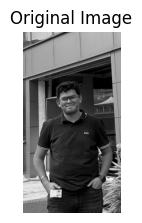

In [3]:
plt.figure(figsize=(14, 8))
plt.subplot(3, 4, 1)
plt.imshow(img, cmap='gray')
plt.title('Original Image')
plt.axis('off')

(np.float64(-0.5), np.float64(1178.5), np.float64(2200.5), np.float64(-0.5))

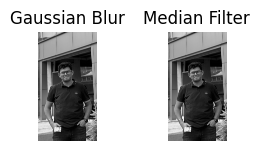

In [4]:
# 1️⃣ Classical Filtering
gaussian = cv2.GaussianBlur(img, (5, 5), 0)
median = cv2.medianBlur(img, 5)
plt.subplot(3, 4, 2); plt.imshow(gaussian, cmap='gray'); plt.title('Gaussian Blur'); plt.axis('off')
plt.subplot(3, 4, 3); plt.imshow(median, cmap='gray'); plt.title('Median Filter'); plt.axis('off')


(np.float64(-0.5), np.float64(1178.5), np.float64(2200.5), np.float64(-0.5))

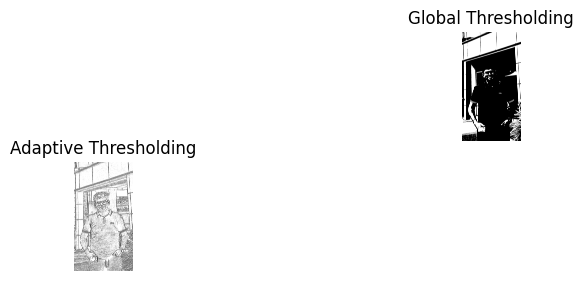

In [5]:
# 2️⃣ Thresholding
_, th_global = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY)
th_adapt = cv2.adaptiveThreshold(img, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
                                 cv2.THRESH_BINARY, 11, 2)
plt.subplot(3, 4, 4); plt.imshow(th_global, cmap='gray'); plt.title('Global Thresholding'); plt.axis('off')
plt.subplot(3, 4, 5); plt.imshow(th_adapt, cmap='gray'); plt.title('Adaptive Thresholding'); plt.axis('off')


(np.float64(-0.5), np.float64(1178.5), np.float64(2200.5), np.float64(-0.5))

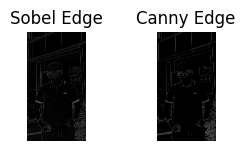

In [6]:
# 3️⃣ Edge Detection
sobelx = cv2.Sobel(img, cv2.CV_64F, 1, 0, ksize=3)
sobely = cv2.Sobel(img, cv2.CV_64F, 0, 1, ksize=3)
edges = cv2.Canny(img, 100, 200)
plt.subplot(3, 4, 6); plt.imshow(np.sqrt(sobelx**2 + sobely**2), cmap='gray'); plt.title('Sobel Edge'); plt.axis('off')
plt.subplot(3, 4, 7); plt.imshow(edges, cmap='gray'); plt.title('Canny Edge'); plt.axis('off')


(np.float64(-0.5), np.float64(1178.5), np.float64(2200.5), np.float64(-0.5))

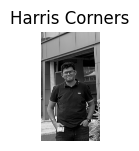

In [7]:
# 4️⃣ Corner Detection
img_harris = cv2.cornerHarris(np.float32(img), 2, 3, 0.04)
img_harris = cv2.dilate(img_harris, None)
corners = img.copy()
corners[img_harris > 0.01 * img_harris.max()] = 255
plt.subplot(3, 4, 8); plt.imshow(corners, cmap='gray'); plt.title('Harris Corners'); plt.axis('off')


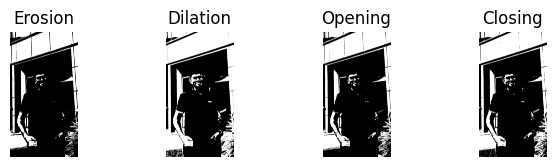

In [11]:
# 5️⃣ Morphological Operations
kernel = np.ones((5, 5), np.uint8)
erosion = cv2.erode(th_global, kernel, iterations=1)
dilation = cv2.dilate(th_global, kernel, iterations=1)
opening = cv2.morphologyEx(th_global, cv2.MORPH_OPEN, kernel)
closing = cv2.morphologyEx(th_global, cv2.MORPH_CLOSE, kernel)

plt.subplot(3, 4, 9); plt.imshow(erosion, cmap='gray'); plt.title('Erosion'); plt.axis('off')
plt.subplot(3, 4, 10); plt.imshow(dilation, cmap='gray'); plt.title('Dilation'); plt.axis('off')
plt.subplot(3, 4, 11); plt.imshow(opening, cmap='gray'); plt.title('Opening'); plt.axis('off')
plt.subplot(3, 4, 12); plt.imshow(closing, cmap='gray'); plt.title('Closing'); plt.axis('off')

plt.tight_layout()
plt.show()


In [12]:
# 6️⃣ Texture Analysis using GLCM
glcm = graycomatrix(img, distances=[1], angles=[0], levels=256, symmetric=True, normed=True)
contrast = graycoprops(glcm, 'contrast')[0, 0]
homogeneity = graycoprops(glcm, 'homogeneity')[0, 0]
energy = graycoprops(glcm, 'energy')[0, 0]

print("\nTexture Features:")
print(f"Contrast: {contrast:.3f}")
print(f"Homogeneity: {homogeneity:.3f}")
print(f"Energy: {energy:.3f}")



Texture Features:
Contrast: 38.428
Homogeneity: 0.550
Energy: 0.042



## 🧾 Explanation of Results
| Concept              | Description                                                                                                           | Example Result                                     |
| :------------------- | :-------------------------------------------------------------------------------------------------------------------- | :------------------------------------------------- |
| **Filtering**        | Removes noise and smoothens image. Gaussian blur preserves edges better; median filter removes salt-and-pepper noise. | Blurred, smooth image.                             |
| **Thresholding**     | Converts grayscale image to binary. Adaptive works better under varying illumination.                                 | White object on black background.                  |
| **Edge Detection**   | Finds object boundaries. Sobel detects direction; Canny gives clean binary edges.                                     | Clear outlines of objects.                         |
| **Corner Detection** | Finds interest points where intensity changes in multiple directions.                                                 | Corners marked white.                              |
| **Morphology**       | Used for shape-based filtering (clean up or connect regions).                                                         | Removes noise or fills gaps.                       |
| **Texture**          | Measures intensity pattern regularity.                                                                                | Numerical values of contrast, homogeneity, energy. |
